<a href="https://colab.research.google.com/github/chloepalin/chloepalin.github.io/blob/master/Copy_of_RealOrFake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!ls gdrive/MyDrive


 animal_classifier.zip
'archive (2).zip'
 archive.zip
'CHLOE PERSONAL USB'
 ciimages.zip
'Colab Notebooks'
 CSSE3010
'Design and Development of an Assistive Technology Device for Enhancing the Running Performance of Blind Athletes.gdoc'
'Design and Development of an Assistive Technology Device for Enhancing the Running Performance of Blind Athleteshesis.gdoc'
'dino code.gdoc'
'EA competencies.gdoc'
 ENGG4900
'Engineering reflections.gdoc'
'FIRST YEAR'
'gui for ELEC4630 a2.3.gdoc'
 HBI
 HOUSE
'How to become a chartered engineer.gdoc'
'LAB4 BIOE6403.gdoc'
'Market Analysis and sales forecast..gdoc'
 milestone.pdf
 ProgressSem1.pptx
'Project brief for my thesis.gdoc'
'Proposal Draft.gdoc'
 RANDOM
'SECOND YEAR'
'sem participation.pdf'
 test.zip
 thesis
'Thesis Idea Development.gdoc'
'THIRD YEAR'
'Untitled document (1).gdoc'
'Untitled document (2).gdoc'
'Untitled document (3).gdoc'
'Untitled document (4).gdoc'
'Untitled document (5).gdoc'
'Untitled document (6).gdoc'
'Untitled document.gdoc'

In [3]:
!unzip gdrive/My\ Drive/archive.zip

Archive:  gdrive/My Drive/archive.zip
replace test/FAKE/0 (10).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  gdrive/My Drive/test.zip
replace FAKE/0 (10).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [27]:
import os
import random
import shutil

TRAIN_DATA_DIRECTORY = '/content/train'
TRAIN_REAL_DIRECTORY = '/content/train/REAL'
TRAIN_FAKE_DIRECTORY = '/content/train/FAKE'

TEST_DATA_DIRECTORY = '/content/test'
TEST_REAL_DIRECTORY = '/content/test/REAL'
TEST_FAKE_DIRECTORY = '/content/test/FAKE'


In [55]:

import tensorflow as tf

img_height = 32 # The dataset is all 32px but this is here just to make sure
img_width = 32
batch_size = 32

# Load the training data
train_ds = tf.keras.utils.image_dataset_from_directory(
  TRAIN_DATA_DIRECTORY,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Load the validation data
val_ds = tf.keras.utils.image_dataset_from_directory(
  TEST_DATA_DIRECTORY,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Quick sanity check to make sure it's all loaded properly
print("Training Classes:")
class_names = train_ds.class_names
print(class_names)

print("Testing Classes:")
class_names = train_ds.class_names
print(class_names)

Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.
Training Classes:
['FAKE', 'REAL']
Testing Classes:
['FAKE', 'REAL']


In [58]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_datagen = train_datagen.flow_from_directory(
    TRAIN_DATA_DIRECTORY,
    batch_size=32,
    target_size=(224, 224),
    class_mode='binary',
    seed=42
)

test_datagen = test_datagen.flow_from_directory(
    TEST_DATA_DIRECTORY,
    batch_size=32,
    target_size=(224, 224),
    class_mode='binary',
    seed=42
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [65]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(20, 3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(20, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(3, padding='valid'),
    tf.keras.layers.Conv2D(20, 3, activation='relu'),
    tf.keras.layers.Conv2D(20, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_datagen,
    epochs=3,
    steps_per_epoch=len(train_datagen),
    validation_data=test_datagen,
    validation_steps=int(0.25 * len(test_datagen))
)

Epoch 1/3
3125/3125 [==============================] - 177s 56ms/step - loss: 0.3487 - accuracy: 0.8483 - val_loss: 0.3666 - val_accuracy: 0.8383
Epoch 2/3
3125/3125 [==============================] - 169s 54ms/step - loss: 0.2488 - accuracy: 0.9020 - val_loss: 0.2399 - val_accuracy: 0.9048
Epoch 3/3
3125/3125 [==============================] - 174s 56ms/step - loss: 0.2155 - accuracy: 0.9160 - val_loss: 0.2207 - val_accuracy: 0.9157


In [67]:
model.evaluate(test_datagen)


625/625 [==============================] - 28s 45ms/step - loss: 0.2249 - accuracy: 0.9102


[0.22486920654773712, 0.9101999998092651]

In [79]:
from sklearn.metrics import confusion_matrix

# Get the predicted labels and true labels
y_pred = model.predict(test_datagen)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)
y_true = test_datagen.classes

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(cm)

625/625 [==============================] - 27s 44ms/step
Confusion Matrix:
[[4663 5337]
 [4705 5295]]


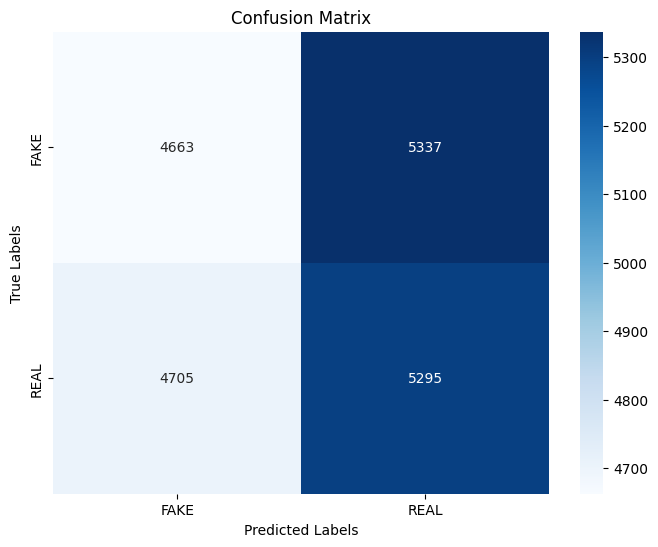

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the classes (assuming "fake" is the positive class)
classes = ['FAKE', 'REAL']

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [78]:
import numpy as np
from google.colab import files
from PIL import Image
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    img_path = fn
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image

    # Make predictions
    predictions = model.predict(img)
    print(predictions)
    if predictions[0] > 0.5:
        print("Real")
    else:
        print("Fake")


Saving 0996.jpg to 0996.jpg
Saving 0997 (2).jpg to 0997 (2).jpg
Saving 0997 (3).jpg to 0997 (3) (1).jpg
Saving 0997 (4).jpg to 0997 (4) (2).jpg
Saving 0997 (5).jpg to 0997 (5) (4).jpg
Saving 0997 (6).jpg to 0997 (6) (2).jpg
Saving 0997 (7).jpg to 0997 (7) (1).jpg
Saving 0997 (8).jpg to 0997 (8) (2).jpg
Saving 0997 (9).jpg to 0997 (9) (1).jpg
Saving 0997 (10).jpg to 0997 (10) (1).jpg
Saving 0997.jpg to 0997 (11).jpg
Saving 0998 (2).jpg to 0998 (2) (1).jpg
Saving 0998 (3).jpg to 0998 (3).jpg
Saving 0998 (4).jpg to 0998 (4).jpg
Saving 0998 (5).jpg to 0998 (5).jpg
Saving 0998 (6).jpg to 0998 (6).jpg
Saving 0998 (7).jpg to 0998 (7).jpg
Saving 0998 (8).jpg to 0998 (8).jpg
Saving 0998 (9).jpg to 0998 (9).jpg
Saving 0998 (10).jpg to 0998 (10).jpg
Saving 0998.jpg to 0998.jpg
Saving 0999 (2).jpg to 0999 (2).jpg
Saving 0999 (3).jpg to 0999 (3).jpg
Saving 0999 (4).jpg to 0999 (4).jpg
Saving 0999 (5).jpg to 0999 (5).jpg
Saving 0999 (6).jpg to 0999 (6).jpg
Saving 0999 (7).jpg to 0999 (7).jpg
Saving 